In [579]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.integrate import quad;

## Part 1

In [582]:
def ramp(x, t_plus = 0):
    if x >  -1 * t_plus:
        return x + t_plus
    else:
        return 0

In [583]:
def unit_step(x, t_plus = 0):
    if x >= -1 * t_plus:
            return 1
    else:
            return 0

##### part 1-1

In the below code we plot unit step and ramp functions

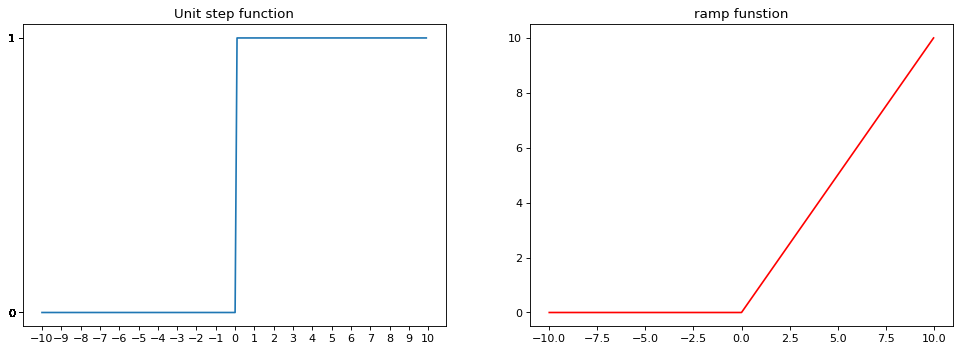

In [584]:
plt.figure(num=1, figsize=(15, 5), dpi=80, edgecolor='k')

plt.subplot(1, 2, 1)
step_x =  list(np.arange(-10, 10, 0.1))
step_y = list(map(unit_step, step_x))

plt.title("Unit step function")
plt.xticks(list(range(-10, 11)))
plt.yticks(step_y)
plt.plot(step_x, step_y)

plt.subplot(1, 2, 2)
x_ramp = np.arange(-10, 10, 0.01)
y_ramp = list(map(ramp, x_ramp))
plt.title("ramp funstion")
plt.plot(x_ramp, y_ramp, 'r-')

This function get the frequency and draw the sample.

In [585]:
def draw_sample(freq, function):
    x_sample = np.linspace(-1, 1, num=2*freq)
    y_sample =  list(map(function, x_sample))
    plt.scatter(x_sample, y_sample)

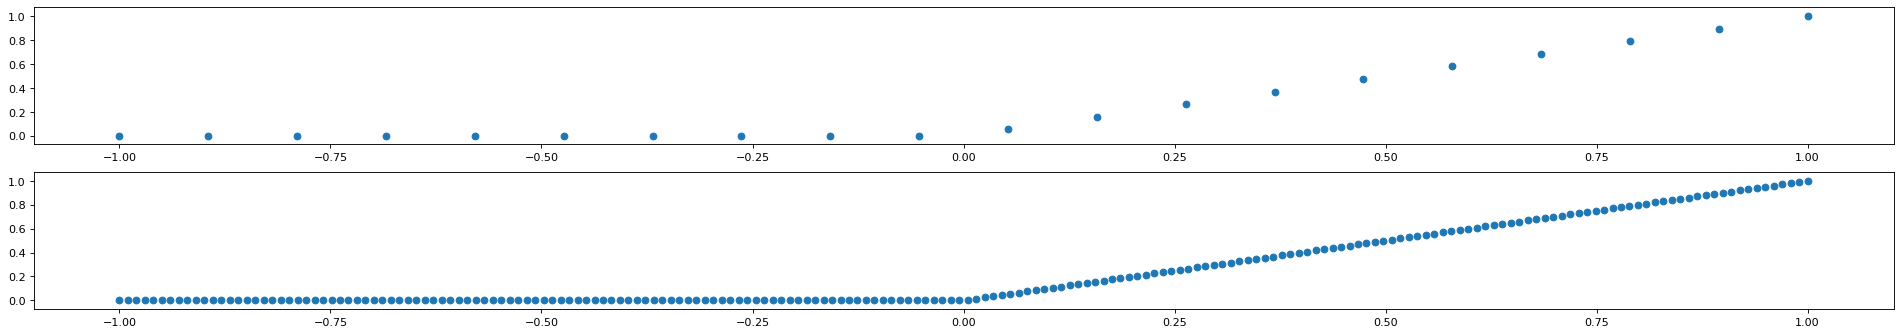

In [586]:
plt.figure(num=1, figsize=(30, 5), dpi=80, edgecolor='k')
plt.subplot(2, 1, 1)
draw_sample(10, ramp)

plt.subplot(2, 1, 2)
draw_sample(100, ramp)

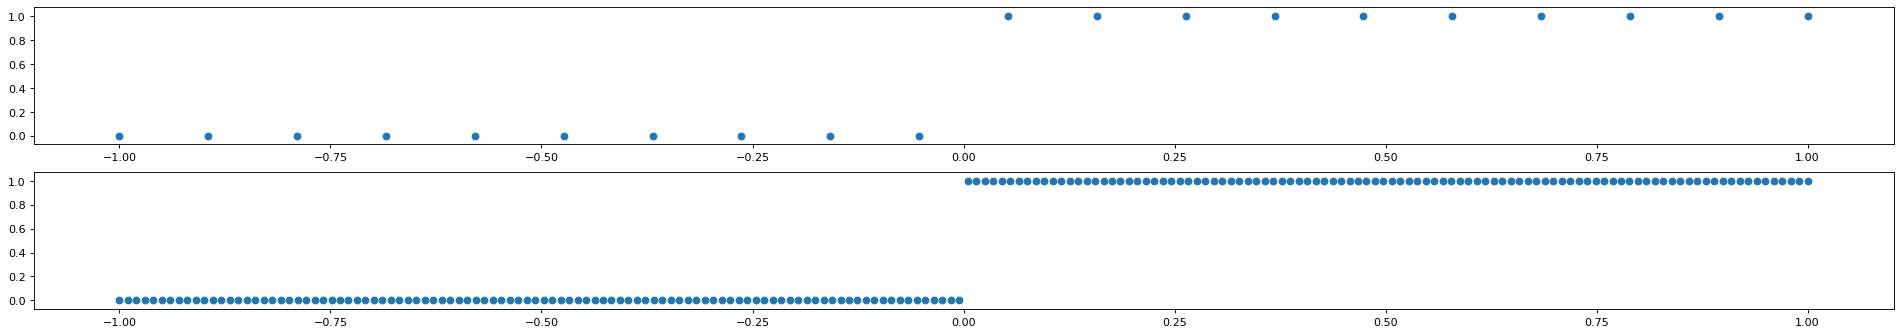

In [587]:
plt.figure(num=1, figsize=(30, 5), dpi=80, edgecolor='k')

plt.subplot(2, 1, 1)
draw_sample(10, unit_step)

plt.subplot(2,1,2)
draw_sample(100,unit_step)

For calculating x(t) function we consider this relation:

x(t) = -ramp(t+2) + 3ramp(t+1) - 2ramp(t) - u(t - 2)

##### Part 1-2

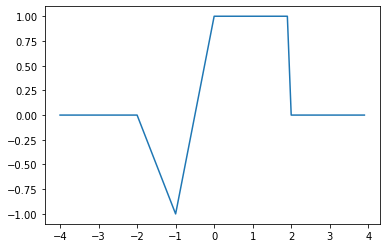

In [588]:
def x_t_function(x, coff = 1, plus = 0):
    y1 = -1 * ramp(x * coff, t_plus = 2 + plus)
    y2 =  3 * ramp(x * coff, t_plus = 1 + plus)
    y3 =  2 * ramp(x * coff, t_plus = plus)
    y4 = 1 * unit_step(x * coff, t_plus = -2 + plus)
    return y1 + y2 - y3 - y4

x = np.arange(-4, 4, 0.1)
y = list(map(x_t_function, x))

plt.plot(x, y)

##### Part 1-3

y1(t) = x(2t+2)

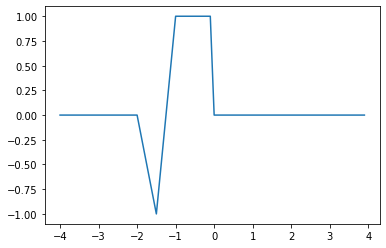

In [589]:
def y1_function(x):
    return x_t_function(x, 2, 2)

x = np.arange(-4, 4, 0.1)
y = list(map(y1_function, x))
plt.plot(x, y)

##### Part 1-4

y2(t)  = x(-t+1)

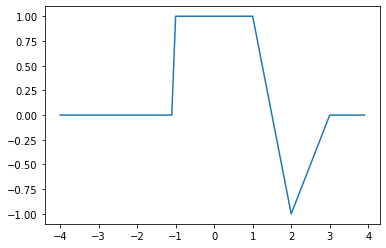

In [590]:
def y2_function(x):
    return x_t_function(x, -1, 1)

x = np.arange(-4, 4, 0.1)
y = list(map(y2_function, x))
plt.plot(x, y)

## Part 2

In [591]:
def xo(n, x_func):
    return (x_func(n) - x_func(-n))/2

def xe(n, x_func):
    return (x_func(n) + x_func(-n))/2

def xl(n, x_func):
    if n >= 0:
        return 0
    else:
        return x_func(n)

def xr(n, x_func):
    if n < 0:
        return 0
    else:
        return x_func(n)

##### part 2-1

In [592]:
def draw_xo_sample(freq, func):
    x_sample = np.linspace(-5, 5, num=2*freq)
    y_sample = [xo(n, func) for n in x_sample]
    plt.scatter(x_sample, y_sample)

def draw_xe_sample(freq, func):
    x_sample = np.linspace(-5, 5, num=2*freq)
    y_sample = [xe(n, func) for n in x_sample]
    plt.scatter(x_sample, y_sample)

def draw_xl_sample(freq, func):
    x_sample = np.linspace(-5, 5, num=2*freq)
    y_sample = [xl(n, func) for n in x_sample]
    plt.scatter(x_sample, y_sample)
    
def draw_xr_sample(freq, func):
    x_sample = np.linspace(-5, 5, num=2*freq)
    y_sample = [xr(n, func) for n in x_sample]
    plt.scatter(x_sample, y_sample)

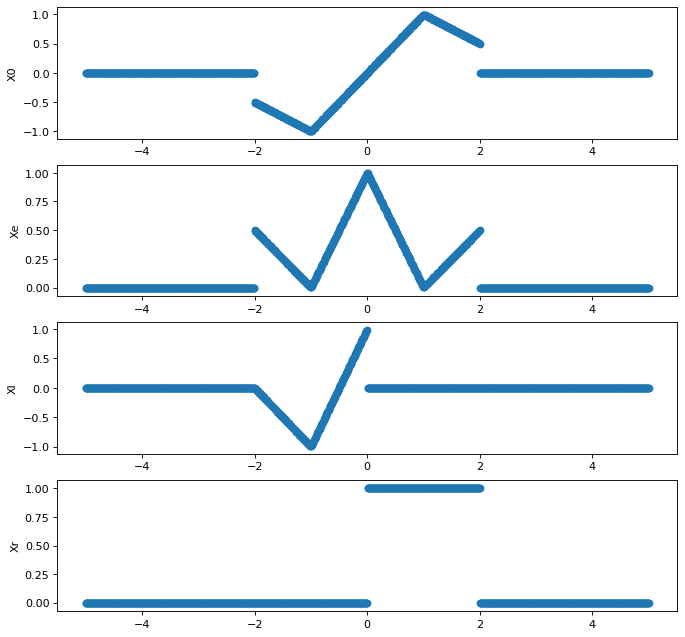

In [593]:
plt.figure(num=1, figsize=(10, 10), dpi=80, edgecolor='k')
plt.subplot(4, 1, 1)
plt.ylabel('X0')
draw_xo_sample(500, x_t_function)

plt.subplot(4, 1, 2)
plt.ylabel("Xe")
draw_xe_sample(500, x_t_function)

plt.subplot(4, 1, 3)
plt.ylabel("Xl")
draw_xl_sample(500, x_t_function)

plt.subplot(4, 1, 4)
plt.ylabel("Xr")
draw_xr_sample(500, x_t_function)

##### Part 2-2

Yes !
We can determinate x[n] using xr and xe function with this relation:
    
    if n > 0 :‌ x[n] = xr[n]
    o.w :‌ x[n]  = 2 * xe[n] - xr[-n]
 
Because the n is negative in xr[-n] expression, -n is positive and xr[0] = x[0], so we can rebuild x[n] for negative n. 
    

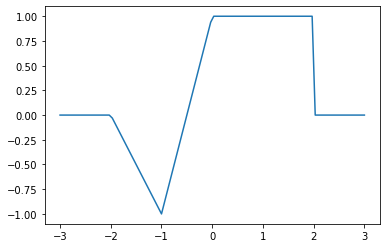

In [594]:
x_array = np.linspace(-3, 3, 100)
result = []
for n in x_array:
    if n > 0:
        result.append(xr(n, x_t_function))
    else:
        result.append(2 * xe(n, x_t_function) - xr(-1 * n, x_t_function))
plt.plot(x_array, result)

##### Part 2-3

No !
xl[0] = 0, so we can rebuild x[n] signal if x[0] = 0 !

## Part 3

##### Part 3-1

For checking linear property at first we calculate y'(t) = y(t) with a1*x1(t) + a2 * x2(t) as x(t) signal
Then we calculate y''(t) = y1(t) + y2(t) which  y1(t) = y(t) with a1 * x1(t) as x(t) signal and y2(t) = y(t) with a2 * x2(t) as x(t) signal

These signals are same!
So the system is linear

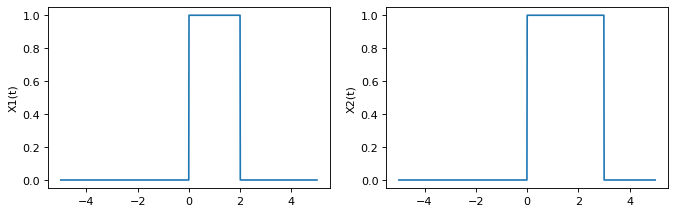

In [595]:
def q3_x1(t):
    return unit_step(t) - unit_step(t - 2)

def q3_x2(t):
    return unit_step(t) - unit_step(t - 3)

x_array = np.linspace(-5, 5, 1000)
plt.figure(num=1, figsize=(10, 3), dpi=80, edgecolor='k')
plt.subplot(1, 2, 1)
plt.ylabel('X1(t)')
plt.plot(x_array, list(map(q3_x1, x_array)))

plt.subplot(1, 2, 2)
plt.ylabel('X2(t)')
plt.plot(x_array, list(map(q3_x2, x_array)))

In [596]:
class IntegralCalculator:
    def __init__(self, x_array, signal):
        self.x_array = x_array
        self.signal = signal
        self.results = []
        for i in range(len(x_array)):
            self.results.append(self.calculate_integral(x_array[i]))
    def formula(self, u, t):
        return np.exp(-(t - u))*self.signal(u-2)
    
    def calculate_integral(self, t):
        return quad(self.formula, -np.inf, np.inf, args=(t, ))[0];

def a1x1(t):
    return 5 * q3_x1(t)

def a2x2(t):
    return 2 * q3_x2(t)

def sum_x1_x2(t):
    return a1x1(t) + a2x2(t)

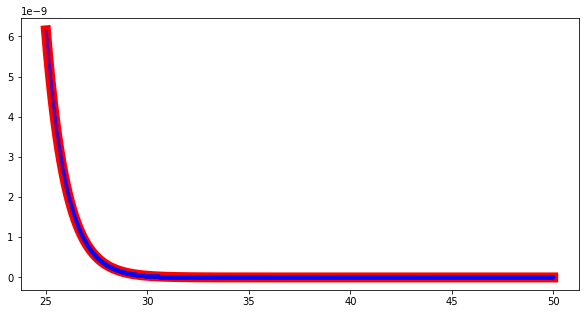

In [599]:
x_array = np.arange(25, 50, 0.01)

integral_of_a1_x1 = IntegralCalculator(x_array, a1x1).results
integral_of_a2_x2 = IntegralCalculator(x_array, a2x2).results
integral_of_sum = IntegralCalculator(x_array, sum_x1_x2).results

seprated_sum = np.array(integral_of_a1_x1) + np.array(integral_of_a2_x2)

plt.figure(figsize=(10,5))
plt.plot(x_array, integral_of_sum, '-r', linewidth=10)
plt.plot(x_array, seprated_sum, '.b', alpha=0.3)

Yes,  as you can see, these signals are same.

##### part 3-2

Answer is yes :)

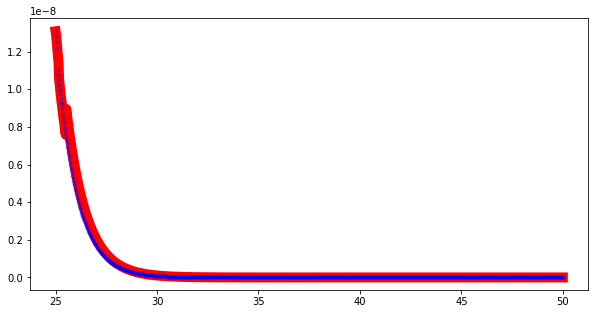

In [603]:
class IntegralCalculator:
    def __init__(self, x_array, signal):
        self.x_array = x_array
        self.signal = signal
        self.results = []
        for i in range(len(x_array)):
            self.results.append(self.calculate_integral(x_array[i]))
    def formula(self, u, t):
        return np.exp(-(t - u))*self.signal(u-2)
    
    def calculate_integral(self, t):
        return quad(self.formula, -13, 13, args=(t, ))[0];

def q3_x3(t):
    return q3_x1(t - 3)

x_array = np.linspace(25, 50, 1000)
integral_of_x1 = IntegralCalculator(x_array - 3, q3_x1).results
integral_of_x3 = IntegralCalculator(x_array, q3_x3).results
plt.figure(figsize=(10,5))
plt.plot(x_array, integral_of_x1, '-r', linewidth=10)
plt.plot(x_array, integral_of_x3, '.b', alpha=0.3)

##### Part 3-3

The system is linear and time invariant, so the system is LTI

## Part 4
In part 4 we must calculate energy of signal, for this purpose we use this formula:
\begin{equation*}
\sum_{n=-\infty}^{+\infty} (x(n))^2)
\end{equation*}

Assumumtion is that each value of each point between two descrete points is same as the previous point. so the continues form is T times more than descrete one and T is 1/frequency.

In [604]:
def calculate_energy(y_array, freq):
    s = 0
    for y in y_array:
        s += y*y
    return s / freq

x_array = np.linspace(-5, 5, 1000)
print(calculate_energy(list(map(x_t_function, x_array)), 100))
print(calculate_energy(list(map(y1_function, x_array)), 100))
print(calculate_energy(list(map(y2_function, x_array)), 100))

2.6659612565518467
1.3319340361382401
2.6649722795868964


## Part 5

##### Part 5-1

For calculating convolution we use this formula:
\begin{equation*}
\sum_{k=-\infty}^{+\infty} (x1(k)) * x2(n - k)
\end{equation*}

In [605]:
def convolve(x1, x2, n):
    result = 0
    for k in range(-50, 50):
        result += x1(k) * x2(n - k)
    return result

##### Part 5-2

In [606]:
def unitstep(t):
    if(t < 0):
        return 0
    else:
        return 1

def x1(n):
    return (2**(int(n)-1) ) * (unitstep(n+2) - unitstep(n-2)) 

def x2(n):
    if 0  < n < 7:
        result = 0
        for i in range(-3, int(n) + 1):
             result += (np.sin(2 * i) + np.cos(np.pi*i)) *( unitstep(i + 3) - unitstep(i - 5))
        return result
    else:
        return 0

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':


<StemContainer object of 3 artists>

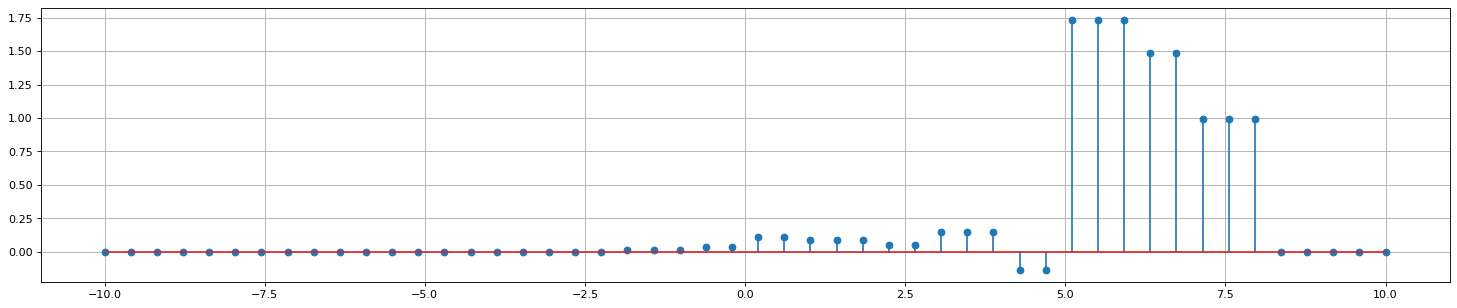

In [607]:
x_array = np.linspace(-10, 10, 50)
y_array1 = list(map(x1, x_array))
y_array2 = list(map(x2, x_array))

conv_vals = []
for i in x_array:
    conv_vals.append(convolve(x1, x2, i))

plt.figure(num=1, figsize=(50, 10), dpi=80, edgecolor='k')
plt.subplot(2, 2, 3)
plt.grid()
plt.stem(x_array, conv_vals)